## Import

In [5]:
import random
import pandas as pd
import numpy as np
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore') 

## Fixed Random-Seed

In [6]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

## Load Data

In [4]:
train= pd.read_csv('./train.csv')
test= pd.read_csv('./test.csv')

FileNotFoundError: [Errno 2] No such file or directory: './test.csv'

In [298]:
train

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [299]:
test

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


In [300]:
train_date_min = train['timestamp'].min()
train_date_max = train['timestamp'].max()

test_date_min = test['timestamp'].min()
test_date_max = test['timestamp'].max()

display(f"train 데이터 기간 : {train_date_min} ~ {train_date_max}")
display(f"test 데이터 기간 : {test_date_min} ~ {test_date_max}")

'train 데이터 기간 : 2019-01-01 ~ 2023-03-03'

'test 데이터 기간 : 2023-03-04 ~ 2023-03-31'

In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [302]:
## EDA, 전처리(?)

In [303]:
#supply, price만 연속형. 

In [304]:
train['item'].value_counts()
#항목별 개수

TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: item, dtype: int64

In [305]:
train['corporation'].value_counts()
#회사별 개수

A    13707
E    13707
D    12184
C     9138
B     7615
F     3046
Name: corporation, dtype: int64

In [306]:
train['location'].value_counts()
#지역별 개수

J    35029
S    24368
Name: location, dtype: int64

In [307]:
train.isna().sum()
#결측값 없음

ID             0
timestamp      0
item           0
corporation    0
location       0
supply(kg)     0
price(원/kg)    0
dtype: int64

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='price(원/kg)'>

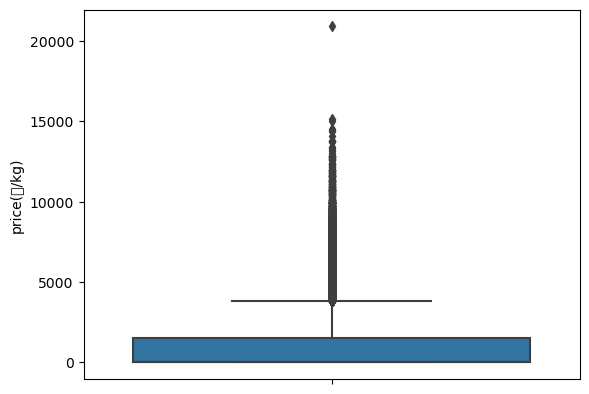

In [309]:
sns.boxplot(y='price(원/kg)',data=train)

<Axes: xlabel='item', ylabel='price(원/kg)'>

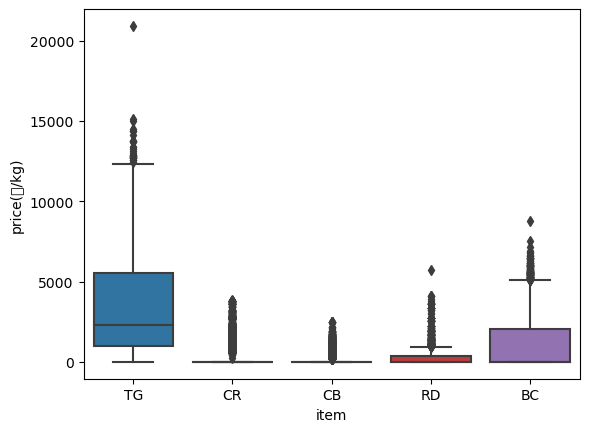

In [310]:
sns.boxplot(x='item',y='price(원/kg)',data=train)
#항목별 가격 박스플롯

<Axes: xlabel='corporation', ylabel='price(원/kg)'>

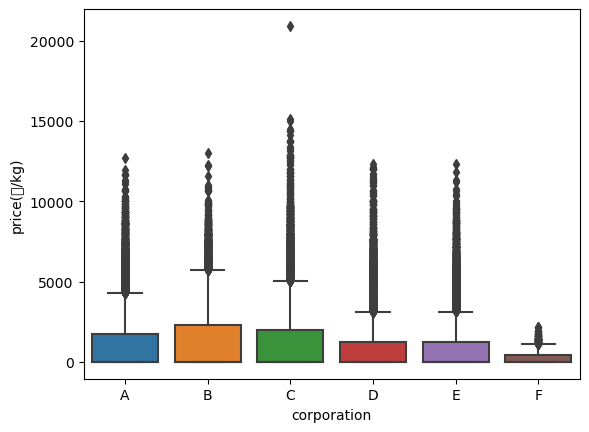

In [311]:
sns.boxplot(x='corporation',y='price(원/kg)',data=train)
#기업별 가격 박스플롯

<Axes: xlabel='location', ylabel='price(원/kg)'>

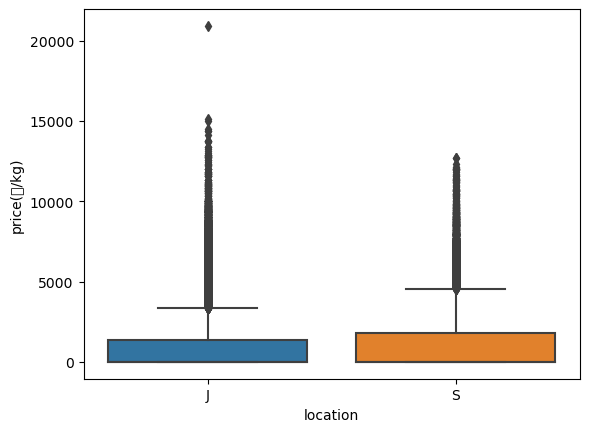

In [312]:
sns.boxplot(x='location',y='price(원/kg)',data=train)
#지역별 가격 박스플롯

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

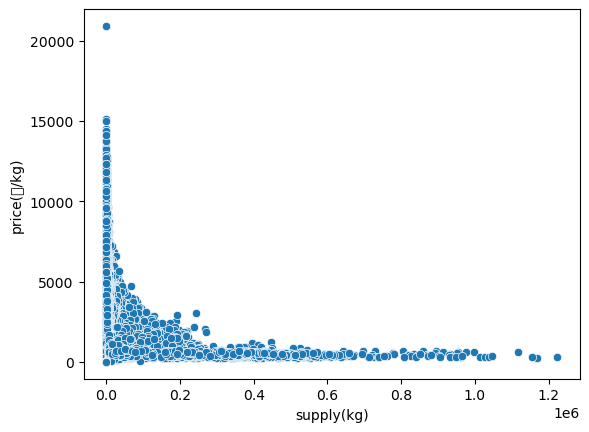

In [313]:
sns.scatterplot(data=train, x='supply(kg)',y='price(원/kg)')
#supply별 가격 분포. 공급 적을수록 가격 높음. 

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

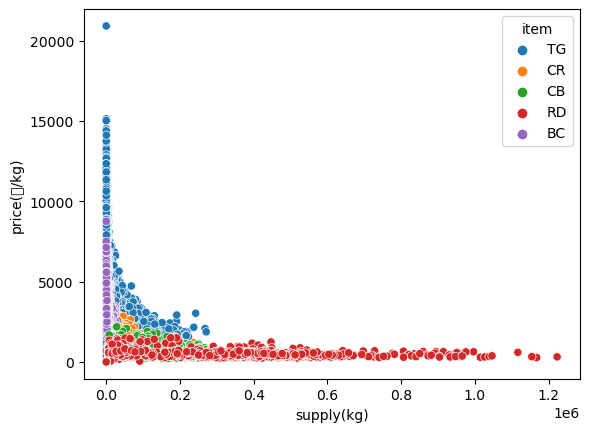

In [314]:
sns.scatterplot(data=train,x ='supply(kg)',y='price(원/kg)',hue='item')
#항복별 supply와 가격 분포. RD는 공급과 가격 간의 큰 상관관계 안 보임. 계속 가격 낮음. BC는 공급량 적음. 대충 이정도 알 수 있는듯?

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

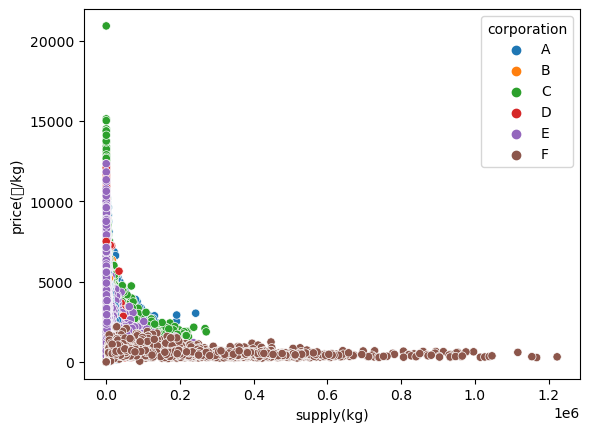

In [315]:
sns.scatterplot(data=train,x ='supply(kg)',y='price(원/kg)',hue='corporation')
#기업별 공급과 가격 산점도.

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

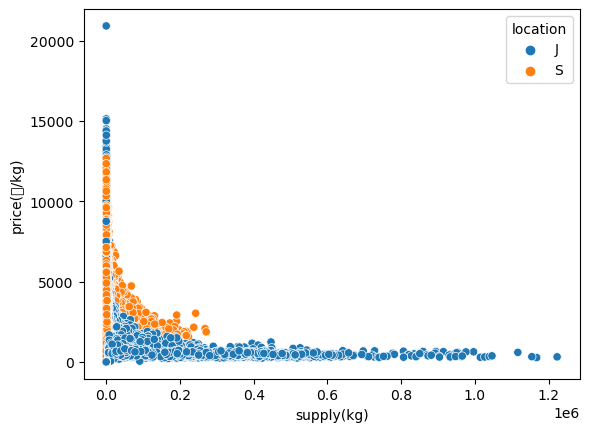

In [316]:
sns.scatterplot(data=train,x ='supply(kg)',y='price(원/kg)',hue='location')
#지역별 공급과 가격 관계.

In [317]:
train.groupby('item').agg(item_mean=('price(원/kg)','mean'))
#항목별 가격 합계

,item_mean
item,
BC,910.196615
CB,152.187131
CR,273.118938
RD,187.073539
TG,3177.442022


In [318]:
train.groupby('corporation').agg(corporation_mean=('price(원/kg)','mean'))
#기업별 가격 합계

,corporation_mean
corporation,
A,1141.704458
B,1544.736179
C,1468.417159
D,1025.189511
E,956.251404
F,259.121799


In [319]:
train.groupby('location').agg(location_mean=('price(원/kg)','mean'))
#지역별 가격 합계

,location_mean
location,
J,1062.35148
S,1231.34139


In [320]:
train[['supply(kg)','price(원/kg)']].corr()
#공급과 가격의 상관계수

,supply(kg),price(원/kg)
supply(kg),1.000000,-0.002297
price(원/kg),-0.002297,1.000000


In [321]:
#시계열 특성을 학습에 반영하기 위해 timestamp를 월, 일, 시간으로 나눔
train['year'] = train['timestamp'].apply(lambda x : int(x[0:4]))
train['month'] = train['timestamp'].apply(lambda x : int(x[5:7]))
train['day'] = train['timestamp'].apply(lambda x : int(x[8:10]))

test['year'] = test['timestamp'].apply(lambda x : int(x[0:4]))
test['month'] = test['timestamp'].apply(lambda x : int(x[5:7]))
test['day'] = test['timestamp'].apply(lambda x : int(x[8:10]))

In [322]:
train

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


In [323]:
test

,ID,timestamp,item,corporation,location,year,month,day
0,TG_A_J_20230304,2023-03-04,TG,A,J,2023,3,4
1,TG_A_J_20230305,2023-03-05,TG,A,J,2023,3,5
2,TG_A_J_20230306,2023-03-06,TG,A,J,2023,3,6
3,TG_A_J_20230307,2023-03-07,TG,A,J,2023,3,7
4,TG_A_J_20230308,2023-03-08,TG,A,J,2023,3,8
...,...,...,...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J,2023,3,27
1088,RD_F_J_20230328,2023-03-28,RD,F,J,2023,3,28
1089,RD_F_J_20230329,2023-03-29,RD,F,J,2023,3,29
1090,RD_F_J_20230330,2023-03-30,RD,F,J,2023,3,30


<Axes: xlabel='year', ylabel='price(원/kg)'>

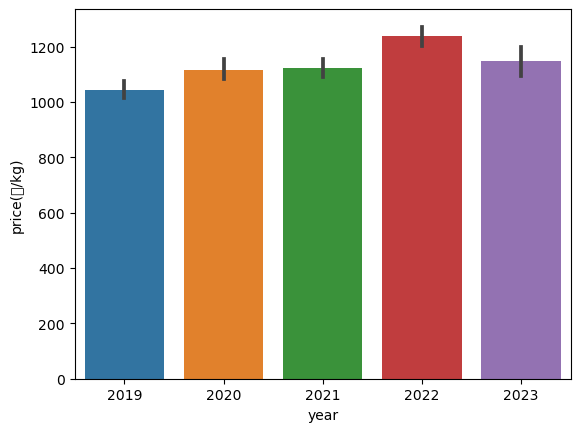

In [324]:
sns.barplot(data=train,x='year',y='price(원/kg)')
#연도별 가격

<Axes: xlabel='month', ylabel='price(원/kg)'>

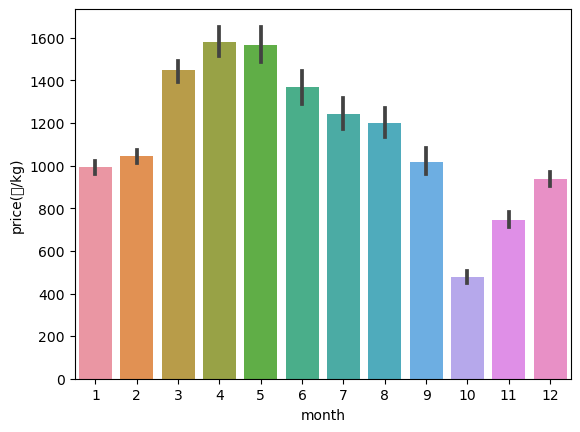

In [325]:
sns.barplot(data=train,x='month',y='price(원/kg)')
#월별 가격 분포

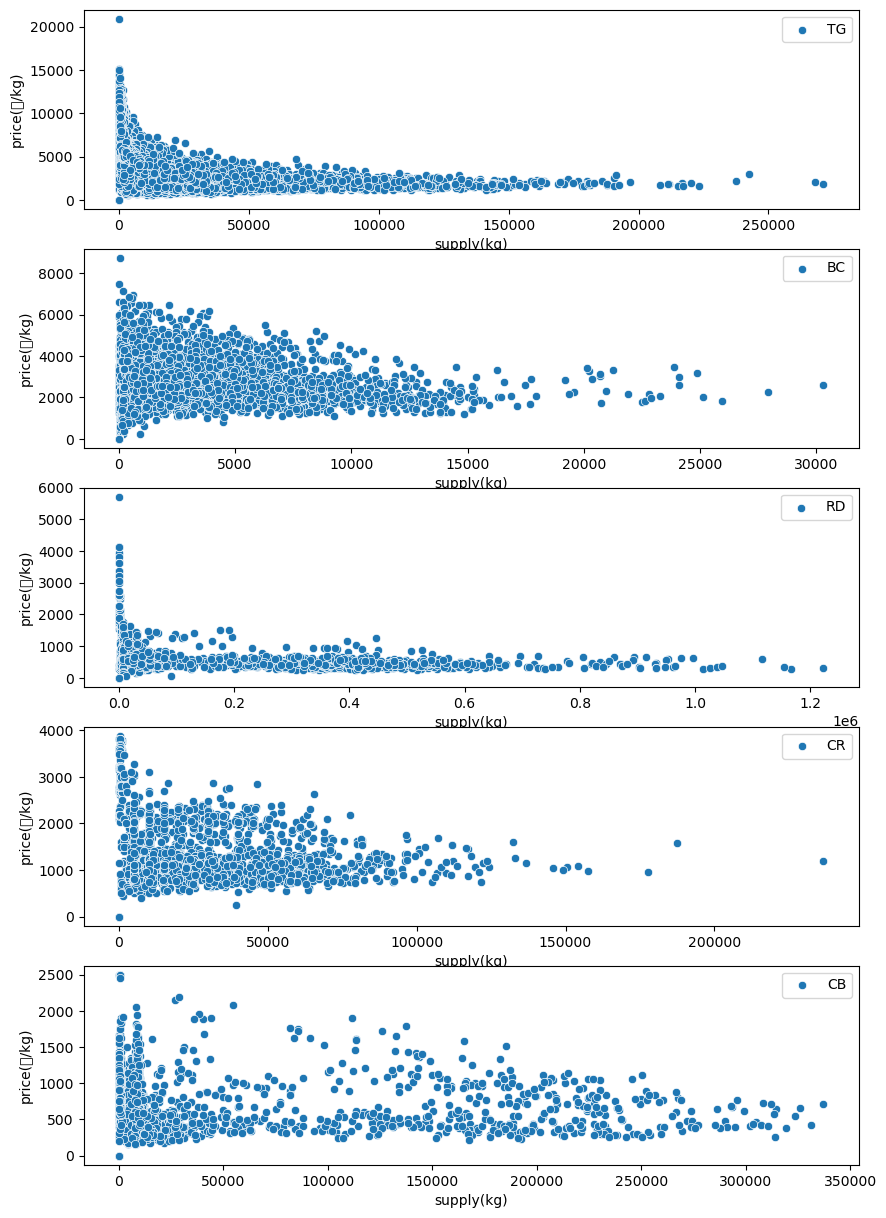

In [326]:
#여긴 코드공유 그대로 따옴... 난 못하겄다ㅜㅜ
items = train['item'].value_counts().index.to_list()
fig, axes = plt.subplots(5,1,figsize=(10,15))
for i in range(len(items)):
    r = i%5
    sns.scatterplot(data = train[train['item']==items[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[r],label=items[i])

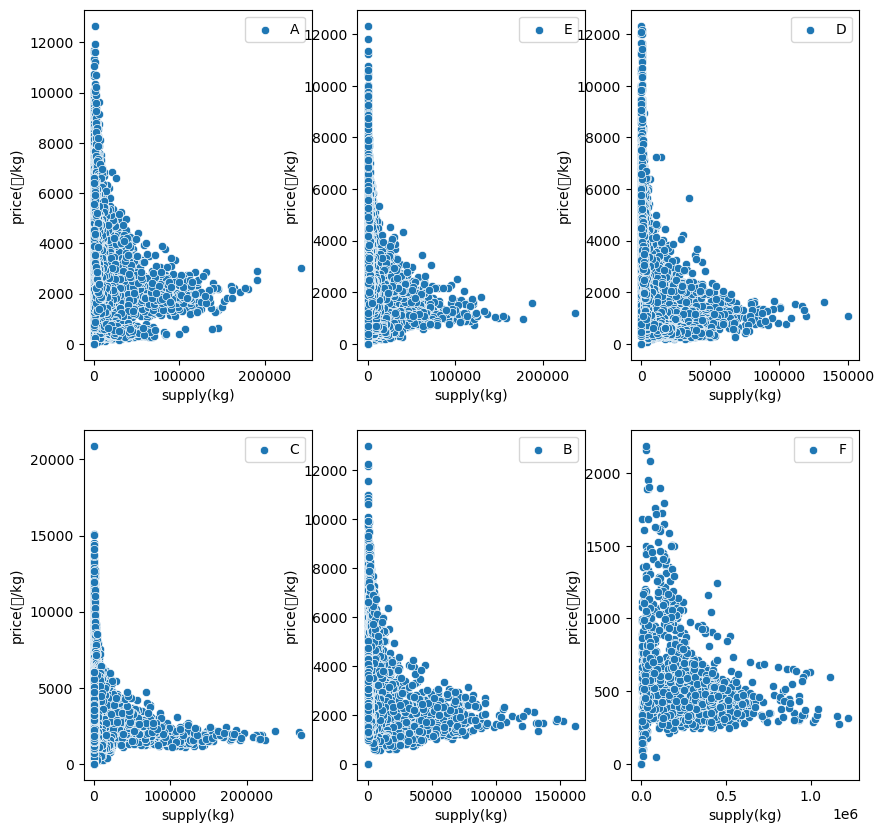

In [327]:
corp = train['corporation'].value_counts().index.to_list()

fig, axes = plt.subplots(2,3,figsize=(10,10))
for i in range(len(corp)):
    n=int(i/3)
    r = i%3
    sns.scatterplot(data = train[train['corporation']==corp[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[n][r],label=corp[i])

<Axes: xlabel='supply(kg)', ylabel='price(원/kg)'>

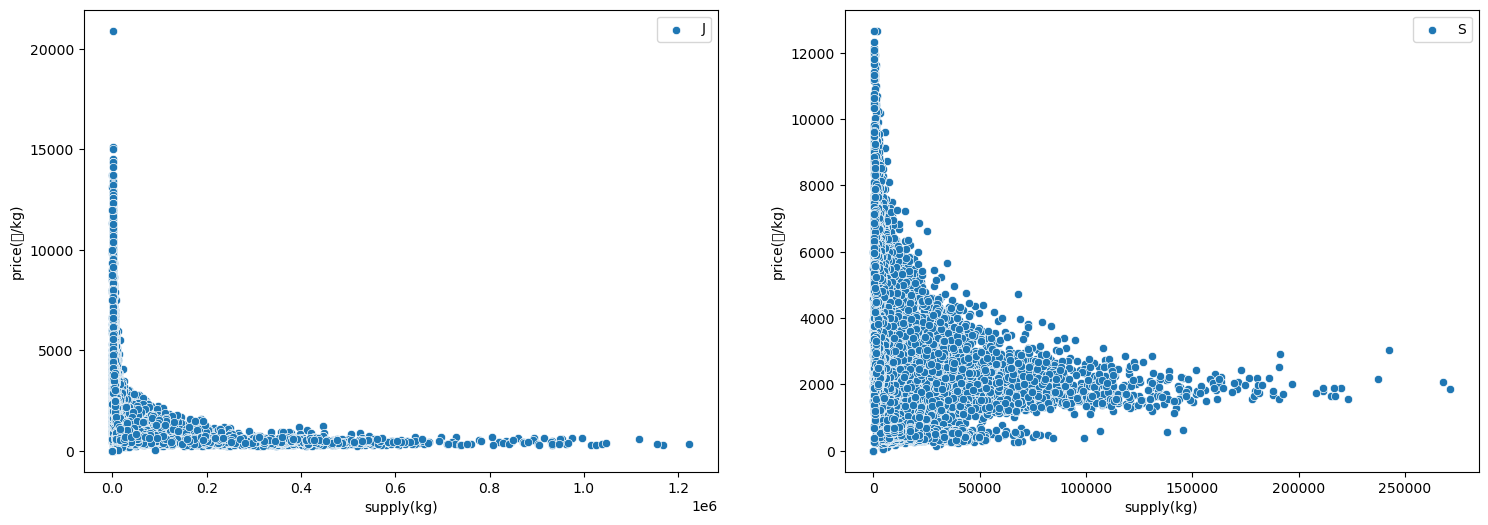

In [328]:
loc = train['location'].value_counts().index.to_list()
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(data = train[train['location']==loc[0]], x = 'supply(kg)',y='price(원/kg)',label=loc[0],ax = axes[0])
sns.scatterplot(data = train[train['location']==loc[1]], x = 'supply(kg)',y='price(원/kg)',label=loc[1],ax = axes[1])

<Axes: xlabel='price(원/kg)', ylabel='Density'>

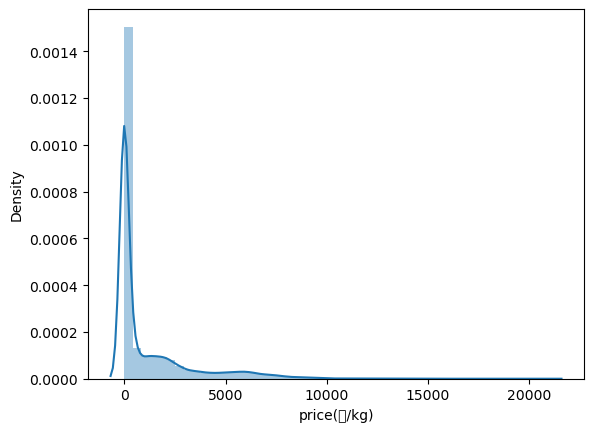

In [329]:
sns.distplot(train['price(원/kg)'])
#가격 dist

In [330]:
train['price(원/kg)'].skew()
#가격 왜도

2.1854712324951593

In [331]:
train['price(원/kg)'].kurt()
#가격 첨도

4.687441664325403

In [332]:
#가격 박스플롯. 여기서 이상치 제거 해야됨

<Axes: ylabel='price(원/kg)'>

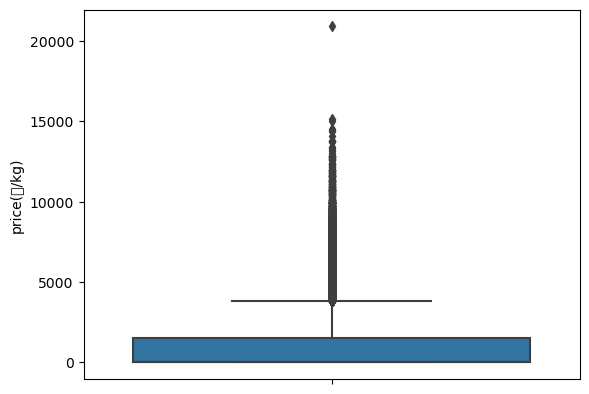

In [333]:
sns.boxplot(y='price(원/kg)',data=train)

In [334]:
round(sum(train['price(원/kg)']==0) / len(train) * 100, 4)
#가격 중 0원 비율 59%. 0원인 경우를 제외해야 할까? 밑에서 한번 제외해봄

59.6916

In [335]:
#기격이 0인 경우를 제외해봄. 꽤 많이 사라짐. 근데 이게 의미가 있을지는 모르겠음

In [336]:
train_1 = train[train['price(원/kg)']!=0]
train_1

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019,1,7
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019,1,8
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


<Axes: xlabel='item', ylabel='price(원/kg)'>

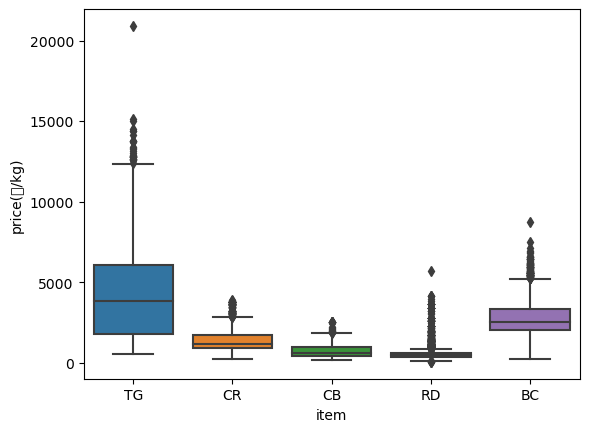

In [337]:
sns.boxplot(x='item',y='price(원/kg)',data=train_1)

<Axes: xlabel='corporation', ylabel='price(원/kg)'>

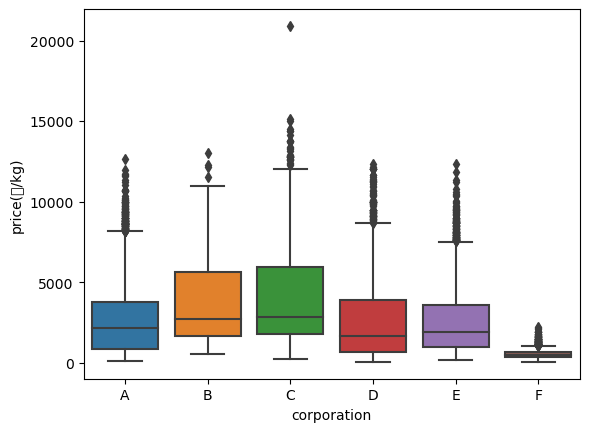

In [338]:
sns.boxplot(x='corporation',y='price(원/kg)',data=train_1)

<Axes: xlabel='location', ylabel='price(원/kg)'>

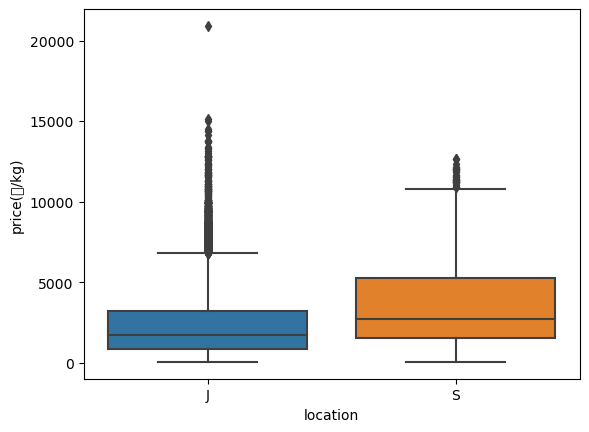

In [339]:
sns.boxplot(x='location',y='price(원/kg)',data=train_1)

In [340]:
train_1.groupby('item').agg(item_mean=('price(원/kg)','mean'))

,item_mean
item,
BC,2757.141436
CB,715.373457
CR,1398.521134
RD,564.184158
TG,4144.962912


In [341]:
train_1.groupby('item').agg(item_min=('price(원/kg)',min))

,item_min
item,
BC,205.0
CB,162.0
CR,250.0
RD,50.0
TG,551.0


In [342]:
train_1.groupby('item').agg(item_max=('price(원/kg)',max))

,item_max
item,
BC,8750.0
CB,2500.0
CR,3882.0
RD,5715.0
TG,20909.0


In [343]:
train_1.groupby('corporation').agg(corporation_mean=('price(원/kg)','mean'))

,corporation_mean
corporation,
A,2693.982269
B,3639.593441
C,3952.399411
D,2538.802642
E,2521.611774
F,568.649135


In [344]:
train_1.groupby('corporation').agg(corporation_min=('price(원/kg)',min))

,corporation_min
corporation,
A,89.0
B,550.0
C,205.0
D,60.0
E,163.0
F,50.0


In [345]:
train_1.groupby('corporation').agg(corporation_max=('price(원/kg)',max))

,corporation_max
corporation,
A,12665.0
B,13000.0
C,20909.0
D,12333.0
E,12333.0
F,2189.0


In [346]:
train_1.groupby('location').agg(location_mean=('price(원/kg)','mean'))

,location_mean
location,
J,2493.006632
S,3328.377926


In [347]:
train_1.groupby('location').agg(location_min=('price(원/kg)',min))

,location_min
location,
J,50.0
S,60.0


In [348]:
train_1.groupby('location').agg(location_max=('price(원/kg)',max))

,location_max
location,
J,20909.0
S,12667.0


<Axes: xlabel='year', ylabel='price(원/kg)'>

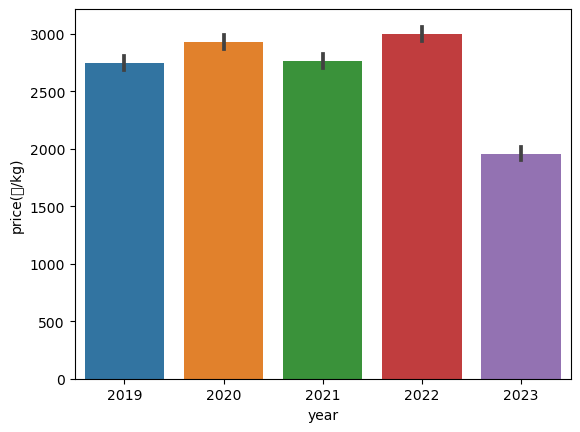

In [349]:
sns.barplot(data=train_1,x='year',y='price(원/kg)')

<Axes: xlabel='month', ylabel='price(원/kg)'>

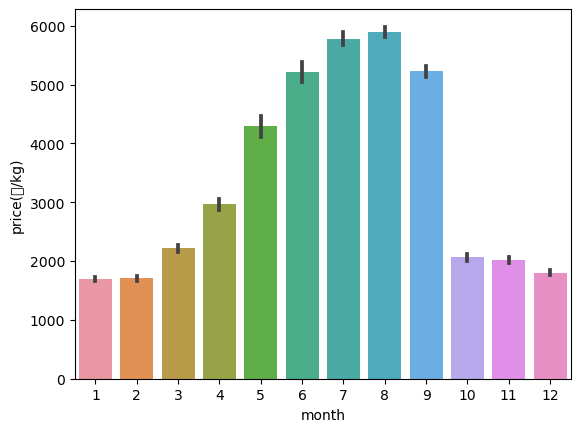

In [350]:
sns.barplot(data=train_1,x='month',y='price(원/kg)')

In [351]:
train_1[['supply(kg)','price(원/kg)']].corr()

,supply(kg),price(원/kg)
supply(kg),1.000000,-0.269416
price(원/kg),-0.269416,1.000000


<Axes: xlabel='price(원/kg)', ylabel='Density'>

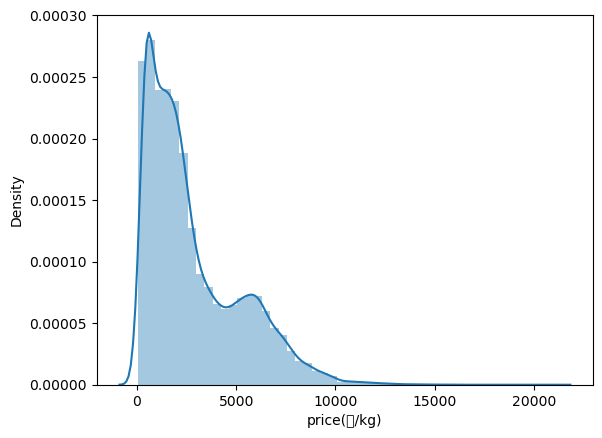

In [352]:
sns.distplot(train_1['price(원/kg)'])

In [353]:
train_1['price(원/kg)'].skew()

1.161252343719246

In [354]:
train_1['price(원/kg)'].kurt()

0.929765394956581

<Axes: ylabel='price(원/kg)'>

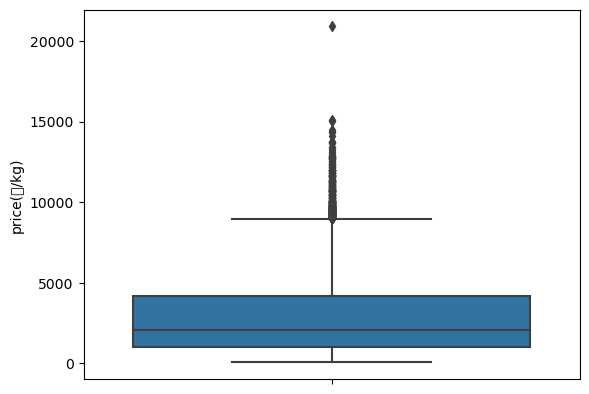

In [355]:
sns.boxplot(y='price(원/kg)',data=train_1)

In [356]:
round(sum(train['supply(kg)']==0) / len(train) * 100, 4)

59.6865

In [357]:
#supply가 0인 경우도 비슷. 일단 한번 제외해봄. 

In [358]:
train_2 = train[train['supply(kg)']!=0]
train_2

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019,1,7
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019,1,8
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


<Axes: xlabel='item', ylabel='price(원/kg)'>

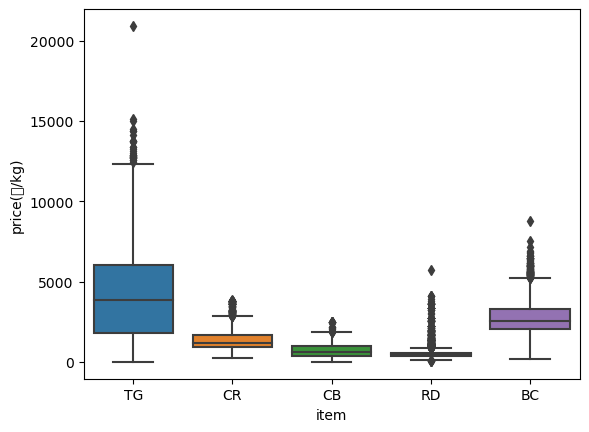

In [359]:
sns.boxplot(x='item',y='price(원/kg)',data=train_2)

<Axes: xlabel='corporation', ylabel='price(원/kg)'>

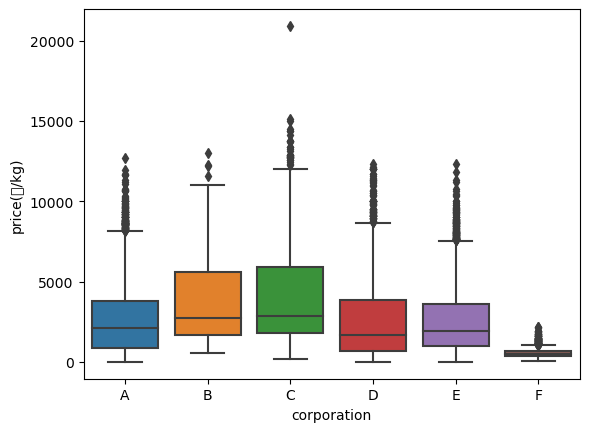

In [360]:
sns.boxplot(x='corporation',y='price(원/kg)',data=train_2)

<Axes: xlabel='location', ylabel='price(원/kg)'>

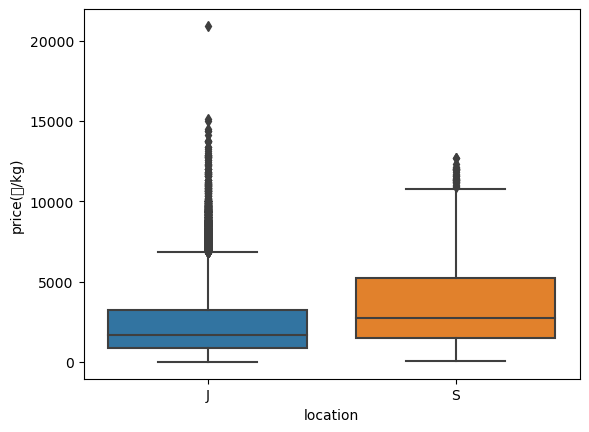

In [361]:
sns.boxplot(x='location',y='price(원/kg)',data=train_2)

In [362]:
train_2.groupby('item').agg(item_mean=('price(원/kg)','mean'))

,item_mean
item,
BC,2757.141436
CB,714.932141
CR,1398.521134
RD,564.184158
TG,4144.252976


In [363]:
train_2.groupby('item').agg(item_min=('price(원/kg)','min'))

,item_min
item,
BC,205.0
CB,0.0
CR,250.0
RD,50.0
TG,0.0


In [364]:
train_2.groupby('item').agg(item_max=('price(원/kg)','max'))

,item_max
item,
BC,8750.0
CB,2500.0
CR,3882.0
RD,5715.0
TG,20909.0


In [365]:
train_2.groupby('corporation').agg(corporation_mean=('price(원/kg)','mean'))

,corporation_mean
corporation,
A,2693.518589
B,3639.593441
C,3952.399411
D,2538.286730
E,2521.126755
F,568.649135


In [366]:
train_2.groupby('corporation').agg(corporation_min=('price(원/kg)','min'))

,corporation_min
corporation,
A,0.0
B,550.0
C,205.0
D,0.0
E,0.0
F,50.0


In [367]:
train_2.groupby('corporation').agg(corporation_max=('price(원/kg)','max'))

,corporation_max
corporation,
A,12665.0
B,13000.0
C,20909.0
D,12333.0
E,12333.0
F,2189.0


In [368]:
train_2.groupby('location').agg(location_mean=('price(원/kg)','mean'))

,location_mean
location,
J,2492.505693
S,3328.377926


In [369]:
train_2.groupby('location').agg(location_min=('price(원/kg)','min'))

,location_min
location,
J,0.0
S,60.0


In [370]:
train_2.groupby('location').agg(location_max=('price(원/kg)','max'))

,location_max
location,
J,20909.0
S,12667.0


<Axes: xlabel='year', ylabel='price(원/kg)'>

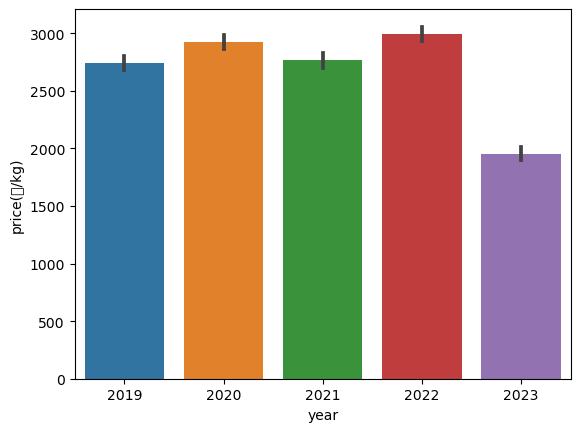

In [371]:
sns.barplot(data=train_2,x='year',y='price(원/kg)')

<Axes: xlabel='month', ylabel='price(원/kg)'>

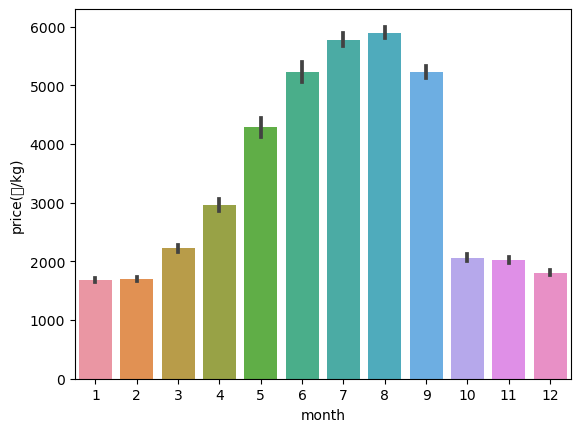

In [372]:
sns.barplot(data=train_2,x='month',y='price(원/kg)')

In [373]:
train_2[['supply(kg)','price(원/kg)']].corr()

,supply(kg),price(원/kg)
supply(kg),1.000000,-0.269334
price(원/kg),-0.269334,1.000000


<Axes: xlabel='price(원/kg)', ylabel='Density'>

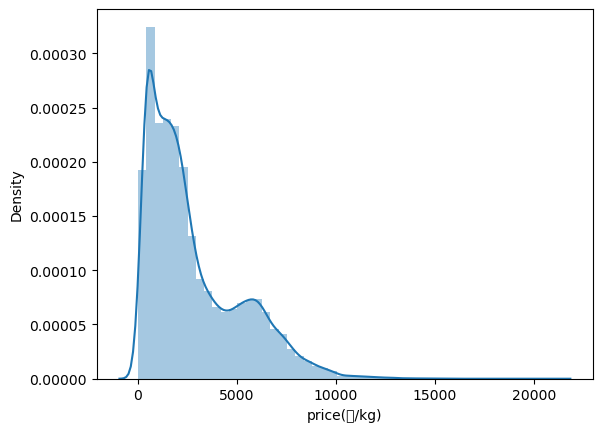

In [374]:
sns.distplot(train_2['price(원/kg)'])

In [375]:
train_2['price(원/kg)'].skew()

1.1612487018554112

In [376]:
train_2['price(원/kg)'].kurt()

0.929802378581118

<Axes: ylabel='price(원/kg)'>

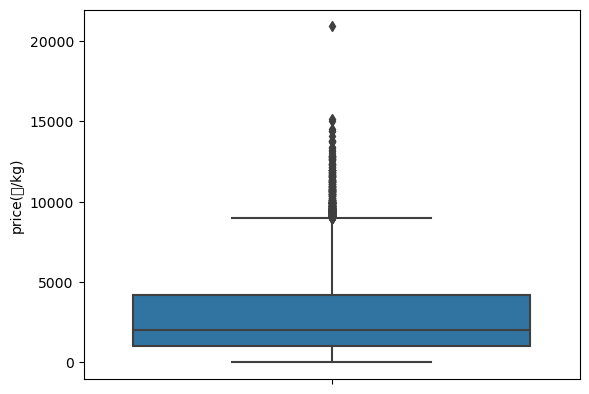

In [377]:
sns.boxplot(y='price(원/kg)', data=train_2)

In [378]:
#가격, 공급 0인 경우 다 제외

In [379]:
train_3 = train[(train['supply(kg)']!=0) & (train['price(원/kg)']!=0)]
train_3

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019,1,7
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019,1,8
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


<Axes: xlabel='item', ylabel='price(원/kg)'>

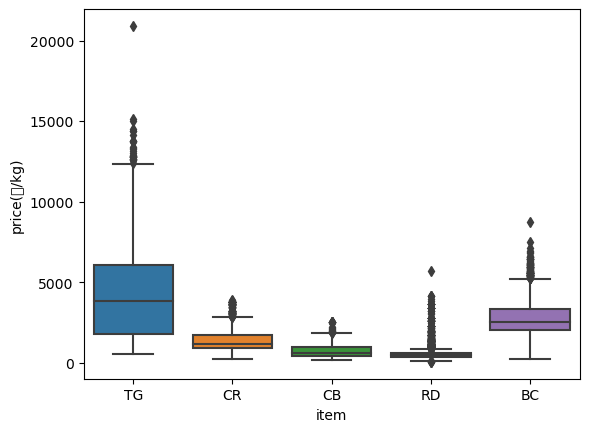

In [380]:
sns.boxplot(x='item',y='price(원/kg)',data=train_3)

<Axes: xlabel='corporation', ylabel='price(원/kg)'>

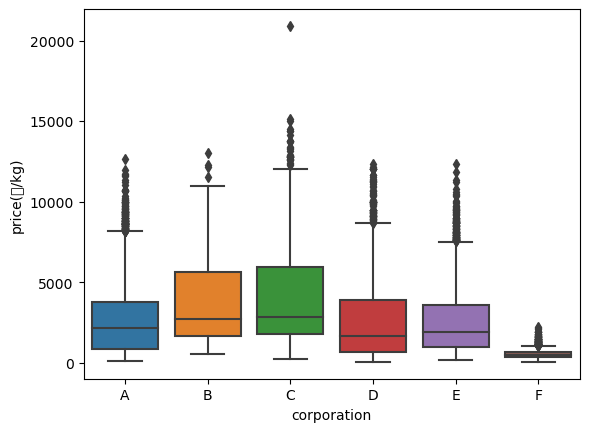

In [381]:
sns.boxplot(x='corporation',y='price(원/kg)',data=train_3)

<Axes: xlabel='location', ylabel='price(원/kg)'>

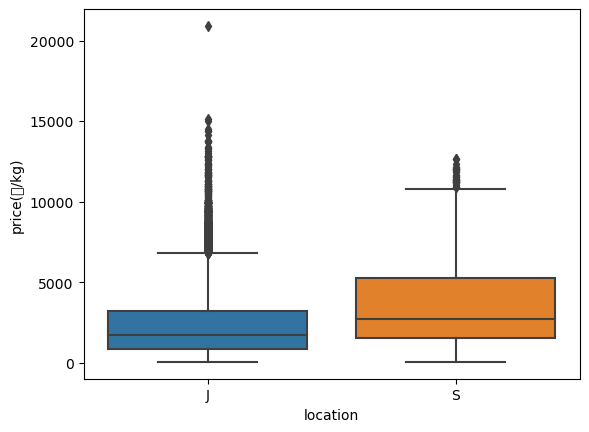

In [382]:
sns.boxplot(x='location',y='price(원/kg)',data=train_3)

In [383]:
train_3.groupby('item').agg(item_mean=('price(원/kg)','mean'))

,item_mean
item,
BC,2757.141436
CB,715.373457
CR,1398.521134
RD,564.184158
TG,4144.962912


In [384]:
train_3.groupby('item').agg(item_min=('price(원/kg)','min'))

,item_min
item,
BC,205.0
CB,162.0
CR,250.0
RD,50.0
TG,551.0


In [385]:
train_3.groupby('item').agg(item_max=('price(원/kg)','max'))

,item_max
item,
BC,8750.0
CB,2500.0
CR,3882.0
RD,5715.0
TG,20909.0


In [386]:
train_3.groupby('corporation').agg(corporation_mean=('price(원/kg)','mean'))

,corporation_mean
corporation,
A,2693.982269
B,3639.593441
C,3952.399411
D,2538.802642
E,2521.611774
F,568.649135


In [387]:
train_3.groupby('corporation').agg(corporation_min=('price(원/kg)','min'))

,corporation_min
corporation,
A,89.0
B,550.0
C,205.0
D,60.0
E,163.0
F,50.0


In [388]:
train_3.groupby('corporation').agg(corporation_max=('price(원/kg)','max'))

,corporation_max
corporation,
A,12665.0
B,13000.0
C,20909.0
D,12333.0
E,12333.0
F,2189.0


In [389]:
train_3.groupby('location').agg(location_mean=('price(원/kg)','mean'))

,location_mean
location,
J,2493.006632
S,3328.377926


In [390]:
train_3.groupby('location').agg(location_min=('price(원/kg)','min'))

,location_min
location,
J,50.0
S,60.0


In [391]:
train_3.groupby('location').agg(location_max=('price(원/kg)','max'))

,location_max
location,
J,20909.0
S,12667.0


In [392]:
train_3[['supply(kg)','price(원/kg)']].corr()
#이건 의미 없을듯 supply랑 price 다 조정해서...

,supply(kg),price(원/kg)
supply(kg),1.000000,-0.269416
price(원/kg),-0.269416,1.000000


<Axes: xlabel='price(원/kg)', ylabel='Density'>

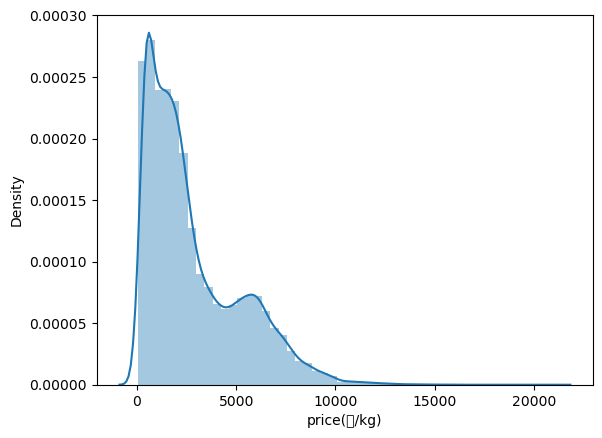

In [393]:
sns.distplot(train_3['price(원/kg)'])

In [394]:
train_3['price(원/kg)'].skew()

1.161252343719246

In [395]:
train_3['price(원/kg)'].kurt()

0.929765394956581

<Axes: ylabel='price(원/kg)'>

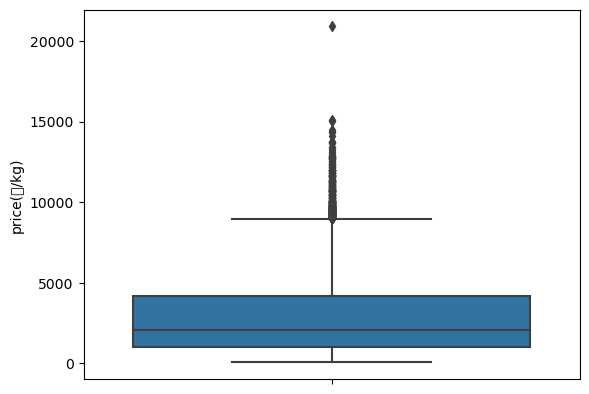

In [396]:
sns.boxplot(y='price(원/kg)', data=train_3)

In [397]:
#----이것이 나의 한계--- 아 자괴감 오진다
#가격이랑 공급 0 제외한 게 의미가 있긴 할까? 그걸 알 수 있는 방법은 무엇일까? 우리내 인생은 어딜 향해 흘러가는 걸까? 공수레공수거...